In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
#reading the data set
data=pd.read_csv("/content/sample_data/Crude oil.csv")
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/28/2022,87.90,241417.0,88.67,88.76,87.08
1,10/27/2022,88.26,273717.0,88.26,89.79,87.33
2,10/26/2022,87.91,271474.0,85.07,88.41,84.14
3,10/25/2022,85.32,226337.0,84.88,86.03,83.06
4,10/24/2022,84.58,238458.0,85.24,85.92,82.63


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2548 entries, 0 to 2547
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2548 non-null   object 
 1   Close/Last  2548 non-null   float64
 2   Volume      2517 non-null   float64
 3   Open        2548 non-null   float64
 4   High        2548 non-null   float64
 5   Low         2548 non-null   float64
dtypes: float64(5), object(1)
memory usage: 119.6+ KB


In [5]:
data['Date']=pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2548 entries, 0 to 2547
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2548 non-null   datetime64[ns]
 1   Close/Last  2548 non-null   float64       
 2   Volume      2517 non-null   float64       
 3   Open        2548 non-null   float64       
 4   High        2548 non-null   float64       
 5   Low         2548 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 119.6 KB


In [6]:
data_new=data.rename(columns={"Close/Last":"last_price"})
data_new=data_new.sort_values(by='Date')
data_new.set_index('Date',inplace=True)
data_new.head()

,last_price,Volume,Open,High,Low
Date,,,,,
2012-10-30,85.68,NaN,85.68,85.68,85.68
2012-10-31,86.24,192354.0,85.73,87.19,85.61
2012-11-01,87.09,185097.0,86.10,87.42,85.92
2012-11-02,84.86,273619.0,86.91,87.24,84.66
2012-11-05,85.65,185846.0,84.65,85.90,84.34


In [7]:
data_new=data_new.resample('D').mean()
data_new

,last_price,Volume,Open,High,Low
Date,,,,,
2012-10-30,85.68,NaN,85.68,85.68,85.68
2012-10-31,86.24,192354.0,85.73,87.19,85.61
2012-11-01,87.09,185097.0,86.10,87.42,85.92
2012-11-02,84.86,273619.0,86.91,87.24,84.66
2012-11-03,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-10-24,84.58,238458.0,85.24,85.92,82.63
2022-10-25,85.32,226337.0,84.88,86.03,83.06
2022-10-26,87.91,271474.0,85.07,88.41,84.14


In [8]:
data_new=data_new.interpolate(method='linear')
data_new

,last_price,Volume,Open,High,Low
Date,,,,,
2012-10-30,85.680000,NaN,85.680000,85.680000,85.680000
2012-10-31,86.240000,192354.000000,85.730000,87.190000,85.610000
2012-11-01,87.090000,185097.000000,86.100000,87.420000,85.920000
2012-11-02,84.860000,273619.000000,86.910000,87.240000,84.660000
2012-11-03,85.123333,244361.333333,86.156667,86.793333,84.553333
...,...,...,...,...,...
2022-10-24,84.580000,238458.000000,85.240000,85.920000,82.630000
2022-10-25,85.320000,226337.000000,84.880000,86.030000,83.060000
2022-10-26,87.910000,271474.000000,85.070000,88.410000,84.140000


In [9]:
data.shape

(2548, 6)

In [10]:
data_new.shape


(3651, 5)

In [11]:
data_new.isnull().sum()

last_price    0
Volume        1
Open          0
High          0
Low           0
dtype: int64

In [12]:
#with interpolation all data are being imputed only one data left
data_new=data_new.drop('2012-10-30')
data_new

,last_price,Volume,Open,High,Low
Date,,,,,
2012-10-31,86.240000,192354.000000,85.730000,87.190000,85.610000
2012-11-01,87.090000,185097.000000,86.100000,87.420000,85.920000
2012-11-02,84.860000,273619.000000,86.910000,87.240000,84.660000
2012-11-03,85.123333,244361.333333,86.156667,86.793333,84.553333
2012-11-04,85.386667,215103.666667,85.403333,86.346667,84.446667
...,...,...,...,...,...
2022-10-24,84.580000,238458.000000,85.240000,85.920000,82.630000
2022-10-25,85.320000,226337.000000,84.880000,86.030000,83.060000
2022-10-26,87.910000,271474.000000,85.070000,88.410000,84.140000


In [13]:
data_new.isnull().sum()

last_price    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [14]:
data_new.describe().T

,count,mean,std,min,25%,50%,75%,max
last_price,3650.0,65.858022,22.708206,-37.63,48.515000,59.622500,86.945000,123.70
Volume,3650.0,385319.349315,229988.575445,153.00,215709.083333,353740.500000,546785.250000,1693652.00
Open,3650.0,65.870078,22.674367,-37.25,48.632500,59.565000,86.902500,124.58
High,3650.0,66.766132,22.782425,-35.20,49.260000,60.383333,88.245833,129.44
Low,3650.0,64.883486,22.538268,-40.32,47.750000,58.732500,86.045000,120.79


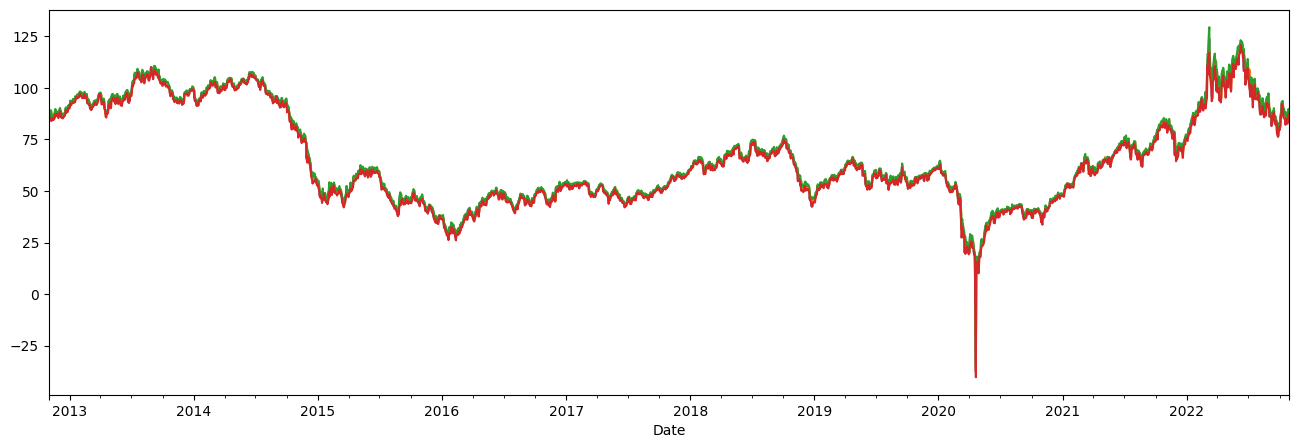

In [15]:
plt.figure(figsize=(16,5))
data_new.last_price.plot()
#data_new.Volume.plot()
data_new.Open.plot()
data_new.High.plot()
data_new.Low.plot()
plt.show()

<Figure size 1600x500 with 0 Axes>

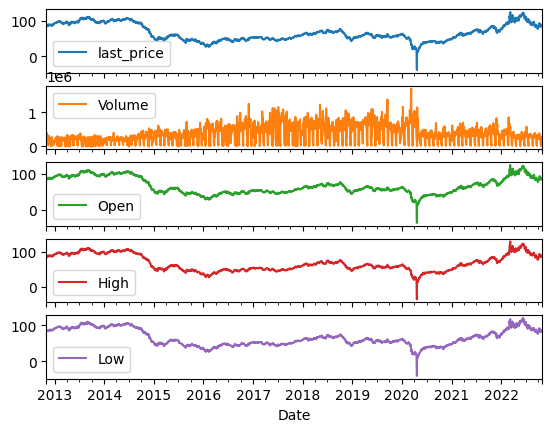

In [16]:
plt.figure(figsize=(16,5))
data_new.plot(subplots=True)
plt.show()

In [17]:
#extracting day,month,week year and storing into a new data frame
df=data_new.copy()
df['Day']=data_new.index.strftime("%d")
df['Month']=data_new.index.strftime("%b")
df['Year']=data_new.index.strftime("%Y")
df['Week_Day']=data_new.index.strftime("%A")
df

,last_price,Volume,Open,High,Low,Day,Month,Year,Week_Day
Date,,,,,,,,,
2012-10-31,86.240000,192354.000000,85.730000,87.190000,85.610000,31,Oct,2012,Wednesday
2012-11-01,87.090000,185097.000000,86.100000,87.420000,85.920000,01,Nov,2012,Thursday
2012-11-02,84.860000,273619.000000,86.910000,87.240000,84.660000,02,Nov,2012,Friday
2012-11-03,85.123333,244361.333333,86.156667,86.793333,84.553333,03,Nov,2012,Saturday
2012-11-04,85.386667,215103.666667,85.403333,86.346667,84.446667,04,Nov,2012,Sunday
...,...,...,...,...,...,...,...,...,...
2022-10-24,84.580000,238458.000000,85.240000,85.920000,82.630000,24,Oct,2022,Monday
2022-10-25,85.320000,226337.000000,84.880000,86.030000,83.060000,25,Oct,2022,Tuesday
2022-10-26,87.910000,271474.000000,85.070000,88.410000,84.140000,26,Oct,2022,Wednesday


In [18]:
temp_df=pd.pivot_table(data=df,values="last_price",index="Year",columns="Month",aggfunc="mean",fill_value=0)
temp_df.head()

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
2012,0.000000,0.000000,88.284839,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.762667,86.240000,0.000000
2013,91.860667,106.580000,97.914946,95.415000,94.716129,104.756452,95.742333,93.264194,94.959677,93.959556,100.663548,106.277000
2014,102.217000,96.199355,58.804516,100.450357,94.862903,102.499677,105.201667,100.683226,101.865161,75.611667,84.480968,93.095333
2015,54.247333,43.202258,37.200968,50.902857,47.820430,51.237419,59.674333,47.789892,59.449677,42.797667,46.292581,45.434667
2016,40.993000,45.020000,52.294274,30.630345,32.051613,44.813710,48.778333,38.297581,46.926290,45.669000,49.811935,45.173500


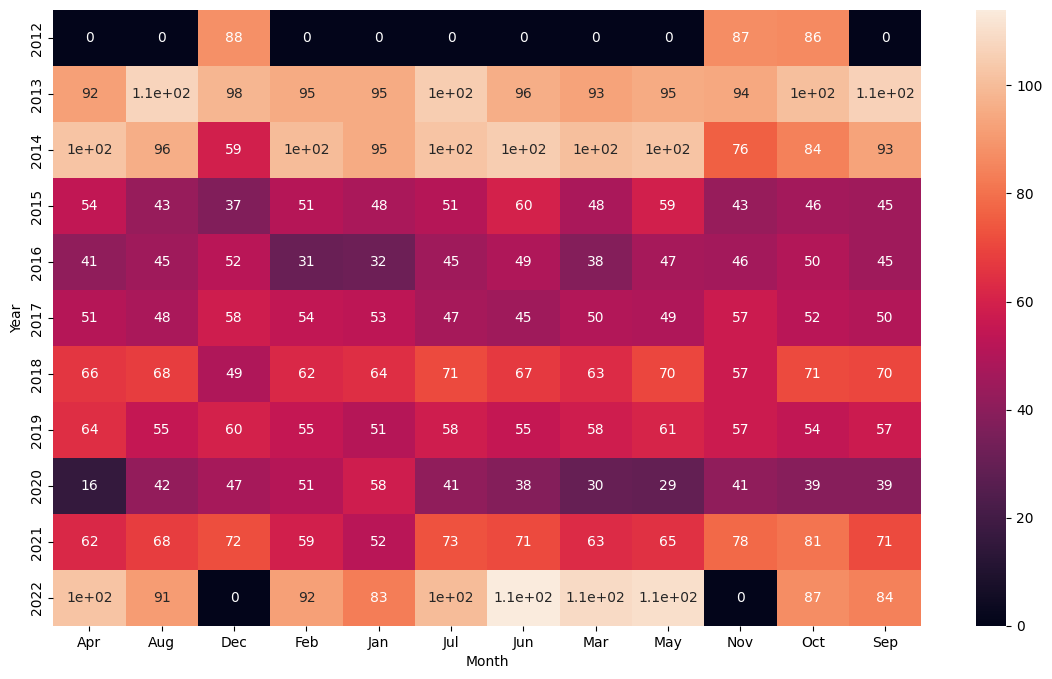

In [19]:
plt.figure(figsize=(14,8))
sns.heatmap(np.round(temp_df),annot=True)
plt.show()

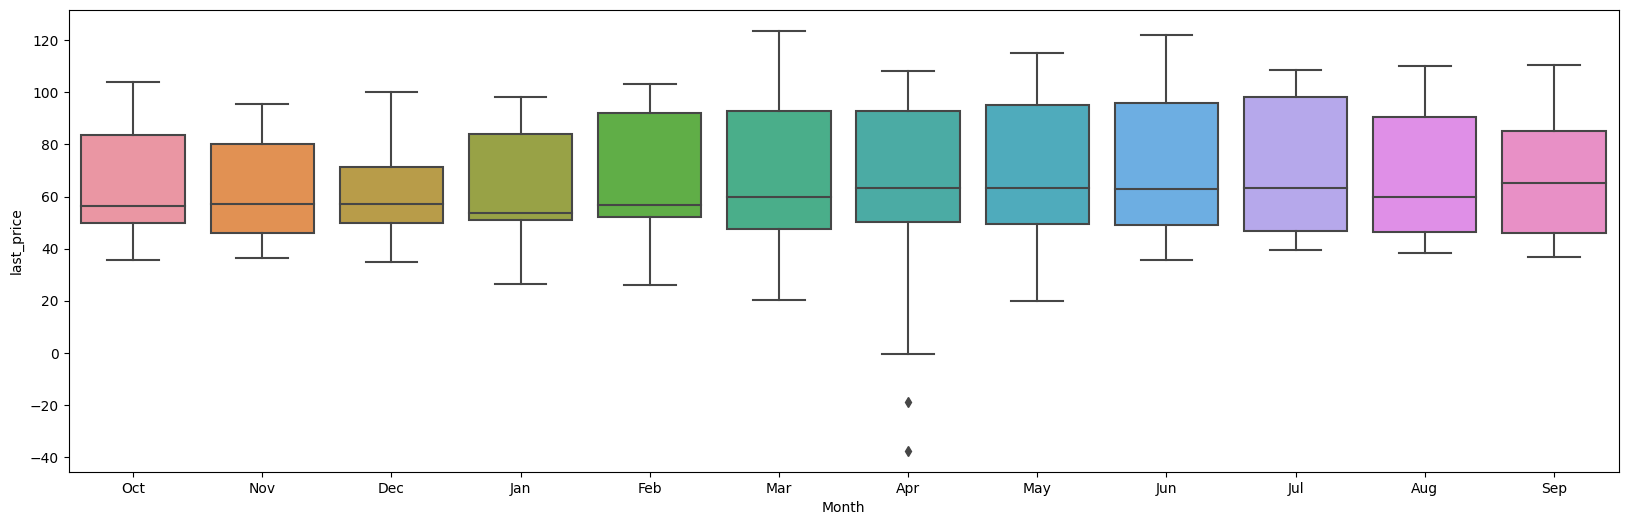

In [20]:
#boxplot month wise to se which month is contributing more
plt.figure(figsize=(20,6))
sns.boxplot(x="Month",y="last_price",data=df);

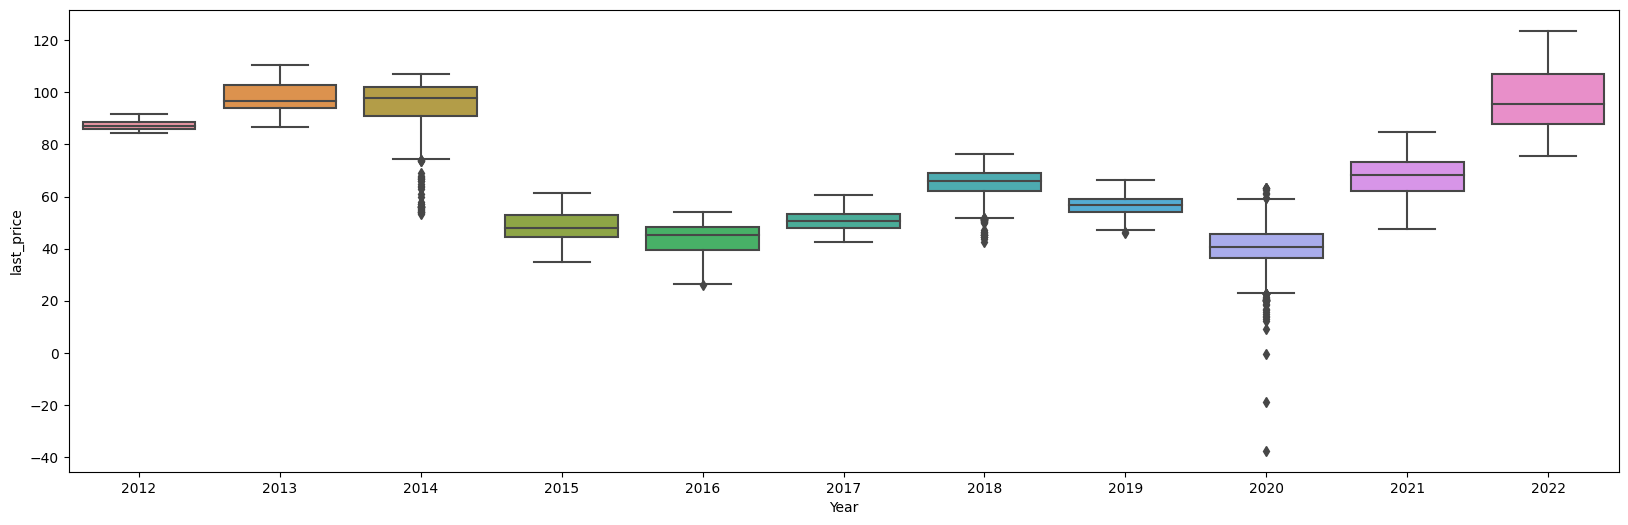

In [21]:
plt.figure(figsize=(20,6))
sns.boxplot(x="Year",y="last_price",data=df);

In [22]:
df


,last_price,Volume,Open,High,Low,Day,Month,Year,Week_Day
Date,,,,,,,,,
2012-10-31,86.240000,192354.000000,85.730000,87.190000,85.610000,31,Oct,2012,Wednesday
2012-11-01,87.090000,185097.000000,86.100000,87.420000,85.920000,01,Nov,2012,Thursday
2012-11-02,84.860000,273619.000000,86.910000,87.240000,84.660000,02,Nov,2012,Friday
2012-11-03,85.123333,244361.333333,86.156667,86.793333,84.553333,03,Nov,2012,Saturday
2012-11-04,85.386667,215103.666667,85.403333,86.346667,84.446667,04,Nov,2012,Sunday
...,...,...,...,...,...,...,...,...,...
2022-10-24,84.580000,238458.000000,85.240000,85.920000,82.630000,24,Oct,2022,Monday
2022-10-25,85.320000,226337.000000,84.880000,86.030000,83.060000,25,Oct,2022,Tuesday
2022-10-26,87.910000,271474.000000,85.070000,88.410000,84.140000,26,Oct,2022,Wednesday


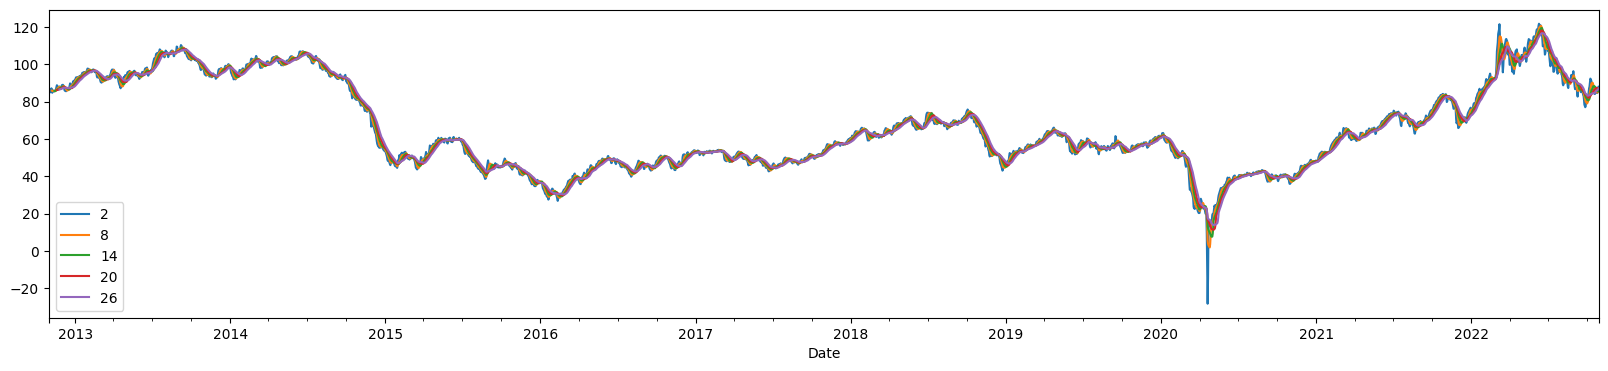

In [23]:
#moving average
plt.figure(figsize=(20,4))
for i in range(2,30,6):
  df.last_price.rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

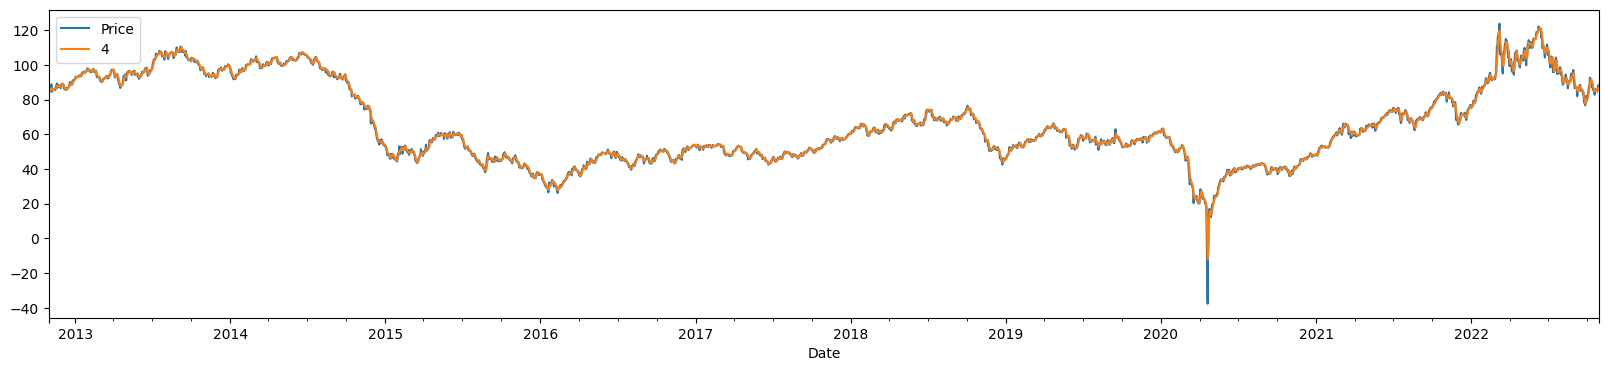

In [24]:
plt.figure(figsize=(20,4))
df.last_price.plot(label="Price")
df.last_price.rolling(4).mean().plot(label=str(4))
plt.legend(loc='best')
plt.show()

<Figure size 1800x400 with 0 Axes>

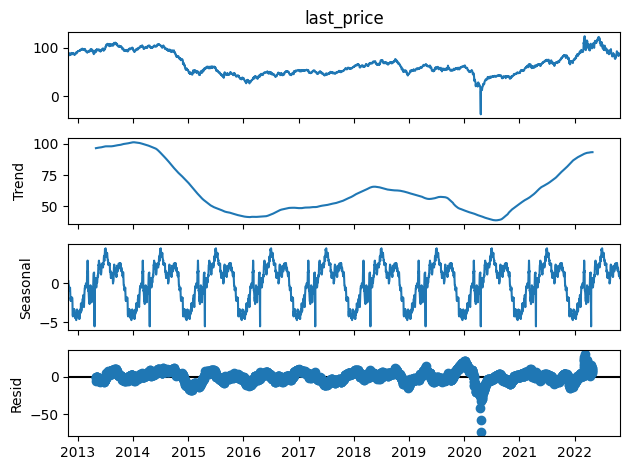

In [25]:
#decompsition plot
plt.figure(figsize=(18,4))
decomp=seasonal_decompose(df.last_price,period=365)
decomp.plot()
plt.show()


In [26]:
df_downsample=data_new.resample('M').mean()
df_downsample

,last_price,Volume,Open,High,Low
Date,,,,,
2012-10-31,86.240000,192354.000000,85.730000,87.190000,85.610000
2012-11-30,86.762667,209374.350000,86.551333,87.615333,85.631333
2012-12-31,88.284839,143282.354839,88.169355,88.985806,87.546774
2013-01-31,94.716129,168390.225806,94.530645,95.133548,93.927097
2013-02-28,95.415000,159742.535714,95.654643,96.143929,94.667143
...,...,...,...,...,...
2022-06-30,114.253167,249153.316667,114.832333,116.732000,111.880167
2022-07-31,99.760161,293927.129032,100.153387,101.169839,97.322581
2022-08-31,91.498065,250554.870968,91.557097,93.122258,89.266452


<Figure size 1800x400 with 0 Axes>

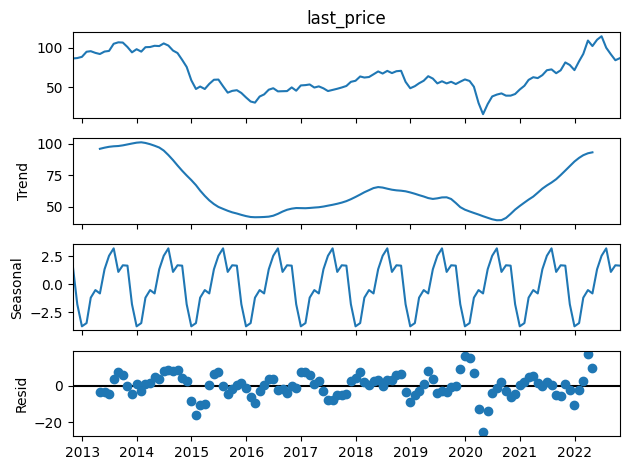

In [27]:
#decompsition plot
plt.figure(figsize=(18,4))
decomp=seasonal_decompose(df_downsample.last_price,period=12)
decomp.plot()
plt.show()

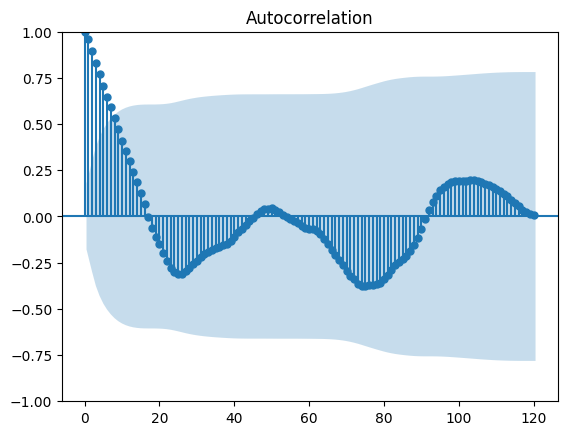

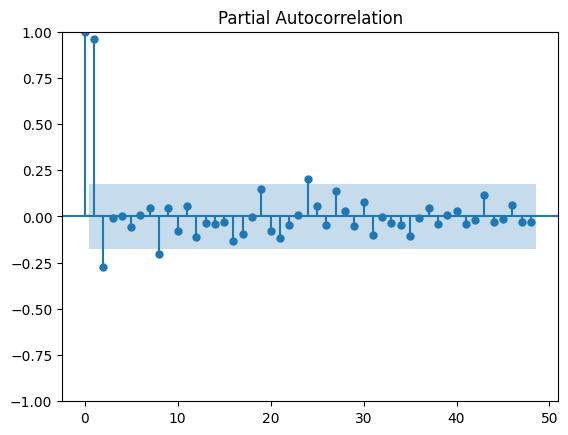

In [28]:
import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(df_downsample.last_price,lags=120)
tsa_plots.plot_pacf(df_downsample.last_price,lags=48)
plt.show()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

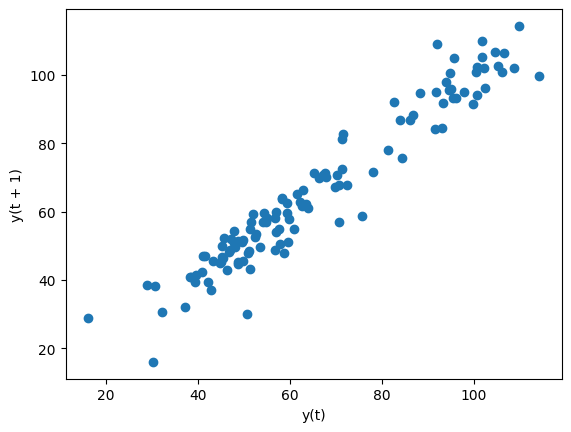

In [48]:
from pandas.plotting import lag_plot
lag_plot(df_downsample['last_price'],lag=1)

In [30]:
#MAPE mean absolute percentage error
def MAPE(pred,org):
  return np.mean((np.abs(pred-org)/org)*100)

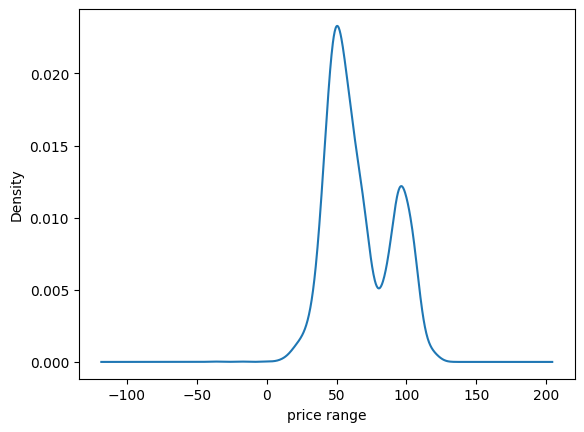

In [31]:
df['last_price'].plot(kind="kde")
plt.xlabel("price range")
plt.show()

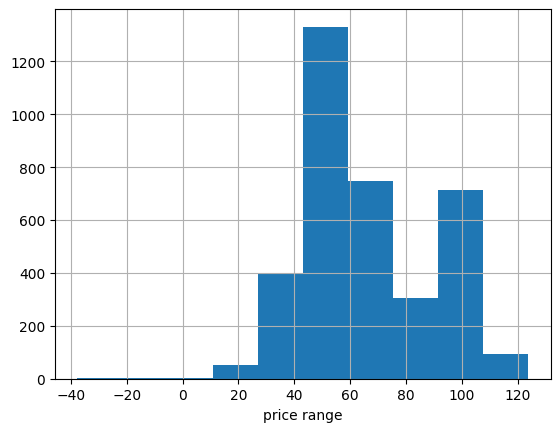

In [32]:
df['last_price'].hist()
plt.xlabel("price range")
plt.show()

In [37]:
data_new.head(10)

,last_price,Volume,Open,High,Low
Date,,,,,
2012-10-31,86.240000,192354.000000,85.730000,87.190000,85.610000
2012-11-01,87.090000,185097.000000,86.100000,87.420000,85.920000
2012-11-02,84.860000,273619.000000,86.910000,87.240000,84.660000
2012-11-03,85.123333,244361.333333,86.156667,86.793333,84.553333
2012-11-04,85.386667,215103.666667,85.403333,86.346667,84.446667
2012-11-05,85.650000,185846.000000,84.650000,85.900000,84.340000
2012-11-06,88.710000,270163.000000,85.670000,89.220000,85.420000
2012-11-07,84.440000,382231.000000,88.420000,88.800000,84.050000
2012-11-08,85.090000,265354.000000,84.520000,85.700000,84.220000


<Axes: >

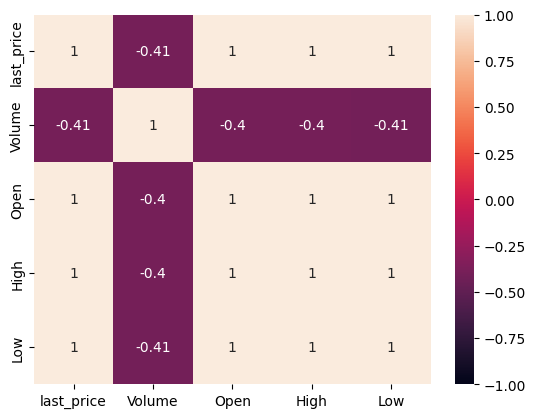

In [34]:
sns.heatmap(data_new.corr(),annot=True,vmax=1,vmin=-1)

In [51]:
from statsmodels.tsa.stattools import adfuller
#Null Hypothesis (HO): Series is non-stationary,
#Alternate Hypothesis(HA): Series is stationary, or series has no unit root.

dftest = adfuller(data_new.last_price, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['adf Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
     dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

#-------: p>0.05 and adfstatistic >critical values So Fail to reject Null Hypothesis

adf Statistic                    -1.847439
p-value                           0.357177
#Lags Used                       23.000000
Number of Observations Used    3626.000000
Critical Value (1%)              -3.432155
Critical Value (5%)              -2.862337
Critical Value (10%)             -2.567194
dtype: float64


In [53]:
from statsmodels.tsa.stattools import kpss

kpsstest = kpss(data_new.last_price, regression='c', nlags="auto")
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
print (kpss_output)

#p is low so null go i.e reject thr Null Hypothesis : hence The Series is Non Stationary

Test Statistic            1.704675
p-value                   0.010000
#Lags Used               38.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


<ipython-input-53-13692d335f64>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(data_new.last_price, regression='c', nlags="auto")


# **MODEl BUILDING**